In [50]:
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scipy.stats as ss
import scikit_posthocs as sp
import pandas as pd
import numpy as np
import seaborn as sns
import os, sys

In [28]:
print("Current working dir : %s" % os.getcwd())

Current working dir : C:\Users\1\Downloads


In [16]:
coloc = pd.read_csv('~/coloc2.csv') 

In [18]:
coloc.head()

,probe,Rval,tM1,tM2,bTau,Rs
0,p12,0.80,0.995,0.991,0.6415,0.823610
1,p12,0.61,0.847,0.659,0.6468,0.813707
2,p12,0.79,0.976,0.914,0.6556,0.824925
3,p12,0.29,0.759,0.837,0.3586,0.496017
4,p12,0.68,0.976,0.956,0.6595,0.825279


In [40]:
coloc.groupby('probe').aggregate({'bTau' : 'mean'})

,bTau
probe,
p12,0.610633
p15,0.487021
p18,0.533589
p21,0.634888
p25,0.632750
p27,0.700225
p28,0.735267
p7,0.596620
p9,0.635982


In [42]:
df = coloc

In [43]:
df.head()

,probe,Rval,tM1,tM2,bTau,Rs
0,p12,0.80,0.995,0.991,0.6415,0.823610
1,p12,0.61,0.847,0.659,0.6468,0.813707
2,p12,0.79,0.976,0.914,0.6556,0.824925
3,p12,0.29,0.759,0.837,0.3586,0.496017
4,p12,0.68,0.976,0.956,0.6595,0.825279


In [ ]:
# https://github.com/maximtrp/scikit-posthocs

In [46]:
lm = sfa.ols('bTau ~ C(probe)', data=df).fit()

In [47]:
anova = sa.stats.anova_lm(lm)

In [48]:
print(anova)

            df    sum_sq   mean_sq         F    PR(>F)
C(probe)   8.0  0.493564  0.061696  5.133686  0.000031
Residual  85.0  1.021512  0.012018       NaN       NaN


In [49]:
sp.posthoc_ttest(df, val_col='bTau', group_col='probe', p_adjust='holm')

,p12,p15,p18,p21,p25,p27,p28,p7,p9
p12,-1.000000,0.813590,1.000000,1.000000,1.000000,1.000000,0.504285,1.000000,1.000000
p15,0.813590,-1.000000,1.000000,0.033698,0.461617,0.026880,0.005061,1.000000,0.326754
p18,1.000000,1.000000,-1.000000,0.073531,0.504285,0.006265,0.002706,1.000000,0.896146
p21,1.000000,0.033698,0.073531,-1.000000,1.000000,1.000000,0.316418,1.000000,1.000000
p25,1.000000,0.461617,0.504285,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000
p27,1.000000,0.026880,0.006265,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000
p28,0.504285,0.005061,0.002706,0.316418,1.000000,1.000000,-1.000000,0.825684,1.000000
p7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.825684,-1.000000,1.000000
p9,1.000000,0.326754,0.896146,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000


In [51]:
data = [df.loc[ids, 'bTau'].values for ids in df.groupby('probe').groups.values()]

In [52]:
H, p = ss.kruskal(*data)

In [53]:
p

0.00012059509064468714

In [54]:
sp.posthoc_conover(df, val_col='bTau', group_col='probe', p_adjust = 'holm')

,p12,p15,p18,p21,p25,p27,p28,p7,p9
p12,-1.000000,0.452359,0.792575,1.000000,1.000000,1.000000,0.381805,1.000000,1.000000
p15,0.452359,-1.000000,1.000000,0.048477,0.178143,0.001991,0.000066,0.538290,0.068986
p18,0.792575,1.000000,-1.000000,0.178143,0.357057,0.008914,0.000539,0.918789,0.195367
p21,1.000000,0.048477,0.178143,-1.000000,1.000000,1.000000,0.452906,1.000000,1.000000
p25,1.000000,0.178143,0.357057,1.000000,-1.000000,1.000000,0.972648,1.000000,1.000000
p27,1.000000,0.001991,0.008914,1.000000,1.000000,-1.000000,1.000000,0.972648,1.000000
p28,0.381805,0.000066,0.000539,0.452906,0.972648,1.000000,-1.000000,0.224214,0.878337
p7,1.000000,0.538290,0.918789,1.000000,1.000000,0.972648,0.224214,-1.000000,1.000000
p9,1.000000,0.068986,0.195367,1.000000,1.000000,1.000000,0.878337,1.000000,-1.000000


In [55]:
pc = sp.posthoc_conover(df, val_col='bTau', group_col='probe')

In [56]:
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}

(<matplotlib.axes._subplots.AxesSubplot at 0x1b42e8a0358>,
 <matplotlib.colorbar.ColorbarBase at 0x1b42e12bdd8>)

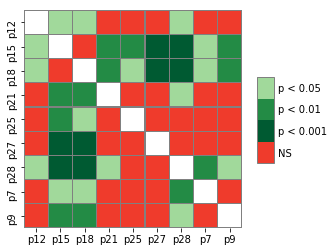

In [57]:
sp.sign_plot(pc, **heatmap_args)

In [64]:
cmap = ['1', '#fb6a4a',  '#08306b',  '#4292c6', '#c6dbef']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}


(<matplotlib.axes._subplots.AxesSubplot at 0x1b42e25af98>,
 <matplotlib.colorbar.ColorbarBase at 0x1b42dc55668>)

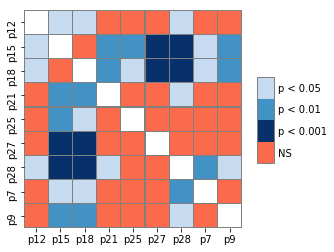

In [65]:
sp.sign_plot(pc, **heatmap_args)

(<matplotlib.axes._subplots.AxesSubplot at 0x1b42e7a6a20>,
 <matplotlib.colorbar.ColorbarBase at 0x1b42db06710>)

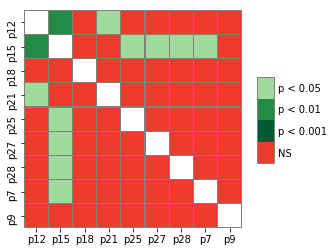

In [66]:
pc = sp.posthoc_conover(df, val_col='Rval', group_col='probe')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)


(<matplotlib.axes._subplots.AxesSubplot at 0x1b42db2d588>,
 <matplotlib.colorbar.ColorbarBase at 0x1b42e0a6358>)

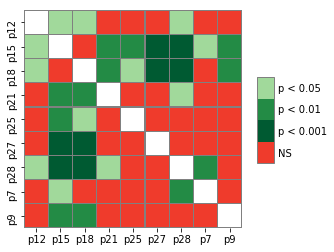

In [67]:
pc = sp.posthoc_conover(df, val_col='Rs', group_col='probe')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)

(<matplotlib.axes._subplots.AxesSubplot at 0x1b42e0be0b8>,
 <matplotlib.colorbar.ColorbarBase at 0x1b42e5a6da0>)

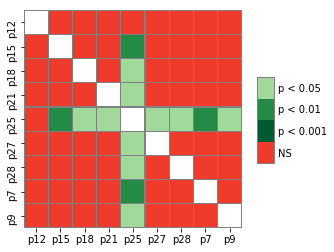

In [68]:
pc = sp.posthoc_conover(df, val_col='tM1', group_col='probe')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)

(<matplotlib.axes._subplots.AxesSubplot at 0x1b42dc12be0>,
 <matplotlib.colorbar.ColorbarBase at 0x1b42e78f9e8>)

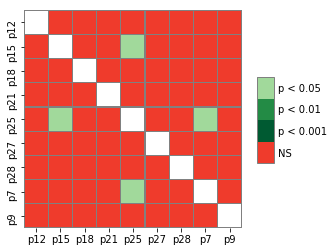

In [69]:
pc = sp.posthoc_conover(df, val_col='tM2', group_col='probe')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)

(<matplotlib.axes._subplots.AxesSubplot at 0x1b42e79b710>,
 <matplotlib.colorbar.ColorbarBase at 0x1b42e6db470>)

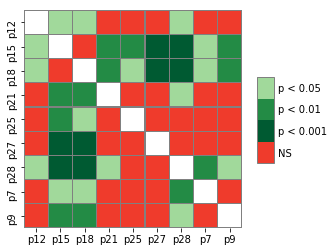

In [70]:
pc = sp.posthoc_conover(df, val_col='bTau', group_col='probe')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)